In [6]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


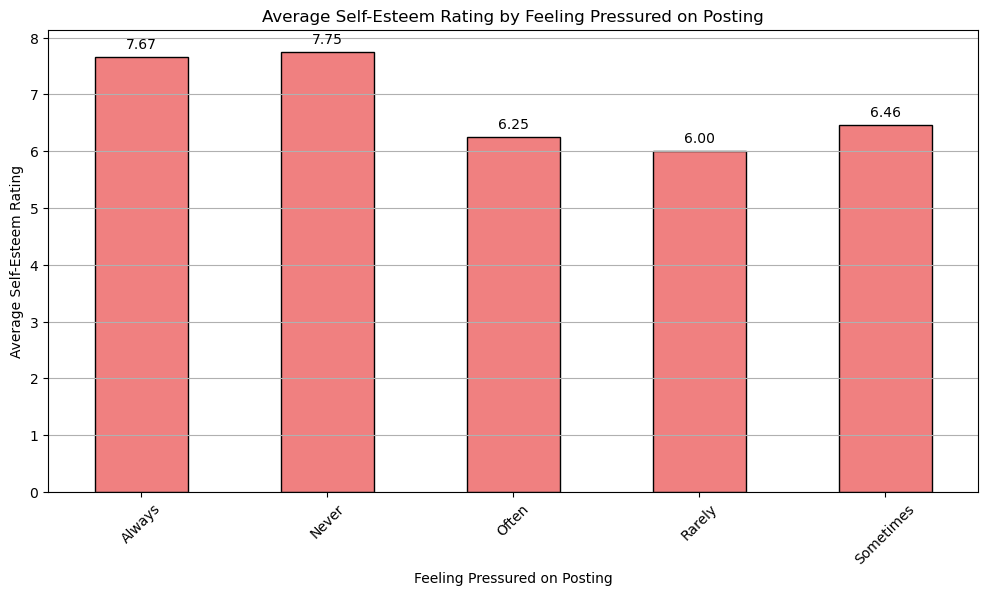

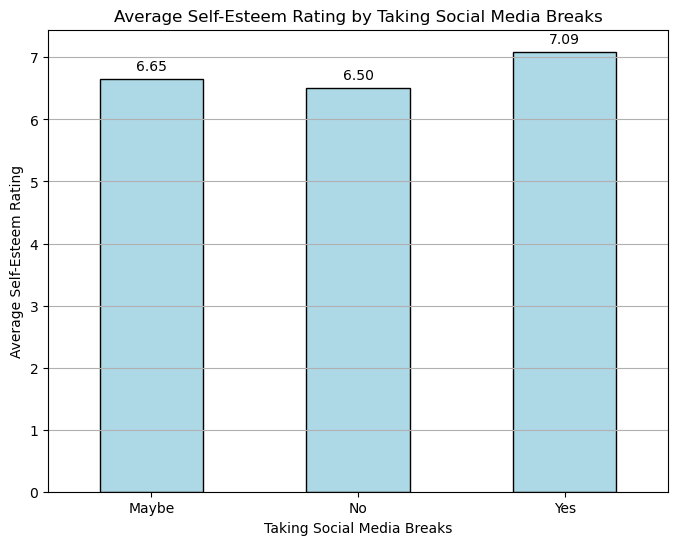

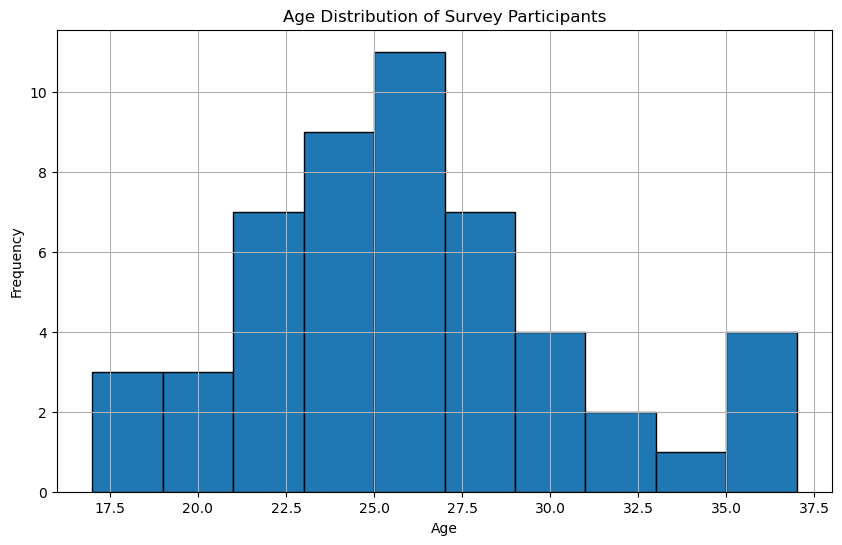

/var/folders/p2/_4hnjhpx6rb4b0x3r2z_vtx80000gn/T/ipykernel_21825/2944880241.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = df.groupby('Age_Group')[['Self_Esteem_Rating', 'Time_Spending_on_Social_Media']].mean()


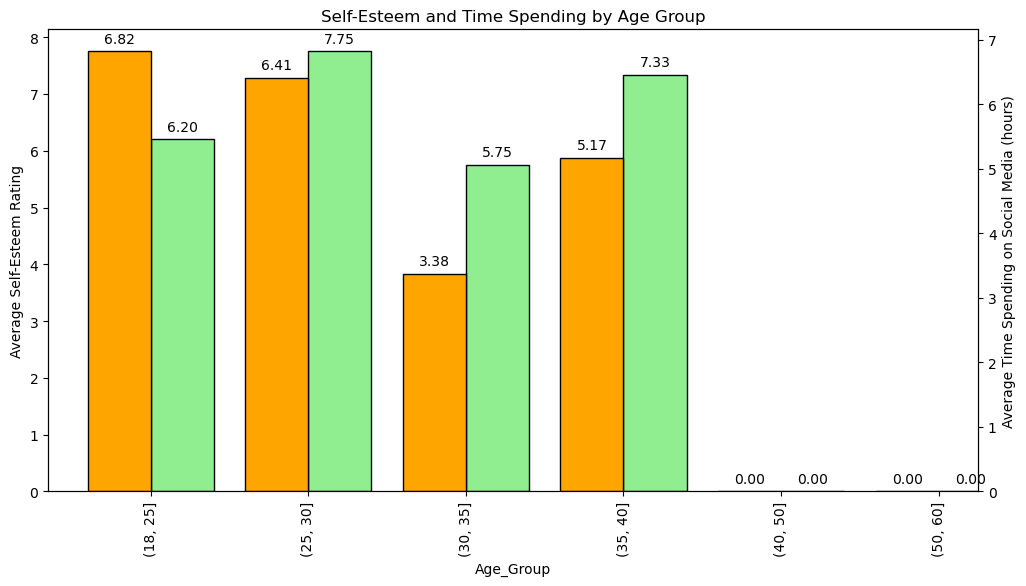

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Social_Media_Usage_Servey.xlsx'
df = pd.read_excel(file_path, sheet_name='Social Media Usage and Self-Est')

# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Define age bins
age_bins = [18, 25, 30, 35, 40, 50, 60]

# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Self-Esteem Ratings vs. Feeling Pressured on Posting
plt.figure(figsize=(12, 6))
pressure_means = df.groupby('Feel_Pressured_on_Posting')['Self_Esteem_Rating'].mean()
ax = pressure_means.plot(kind='bar', color='lightcoral', edgecolor='black')
add_data_labels(ax)
plt.title('Average Self-Esteem Rating by Feeling Pressured on Posting')
plt.xlabel('Feeling Pressured on Posting')
plt.ylabel('Average Self-Esteem Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Average_Self_Esteem_by_Pressure.png')
plt.show()

# Self-Esteem Ratings and Social Media Breaks
plt.figure(figsize=(8, 6))
break_means = df.groupby('Social_media_Break')['Self_Esteem_Rating'].mean()
ax = break_means.plot(kind='bar', color='lightblue', edgecolor='black')
add_data_labels(ax)
plt.title('Average Self-Esteem Rating by Taking Social Media Breaks')
plt.xlabel('Taking Social Media Breaks')
plt.ylabel('Average Self-Esteem Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('Average_Self_Esteem_by_Breaks.png')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Age_Distribution.png')
plt.show()

# Comparison of Self-Esteem and Time Spending by Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)
age_group_means = df.groupby('Age_Group')[['Self_Esteem_Rating', 'Time_Spending_on_Social_Media']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_ylabel('Average Self-Esteem Rating')
ax1.set_xlabel('Age Group')
ax1.set_title('Self-Esteem and Time Spending by Age Group')
ax1.grid(axis='y')
age_group_means['Self_Esteem_Rating'].plot(kind='bar', color='lightgreen', edgecolor='black', position=0, width=0.4, ax=ax1)
add_data_labels(ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Average Time Spending on Social Media (hours)')
age_group_means['Time_Spending_on_Social_Media'].plot(kind='bar', color='orange', edgecolor='black', position=1, width=0.4, ax=ax2)
add_data_labels(ax2)

plt.savefig('Self_Esteem_and_Time_Spending_by_Age.png')
plt.show()



Descriptive Statistics:
            Age  Hours_on_Social_Media  Self_Esteem_Rating
count  50.00000               5.000000            50.00000
mean   25.56000               7.100000             6.84000
std     4.80289               5.212965             2.31552
min    17.00000               2.500000             1.00000
25%    22.25000               2.500000             5.00000
50%    25.00000               6.500000             7.00000
75%    27.75000               9.000000             8.00000
max    37.00000              15.000000            10.00000

Correlation Matrix:
                       Hours_on_Social_Media  Self_Esteem_Rating
Hours_on_Social_Media               1.000000            0.188381
Self_Esteem_Rating                  0.188381            1.000000

Cross-tabulation: Gender vs. Self-Esteem:
Self_Esteem_Rating  1   2   3   4   5   6   7   8   9   10
Gender                                                    
Female               1   0   1   1   8   2   6   5   3   5
Male     

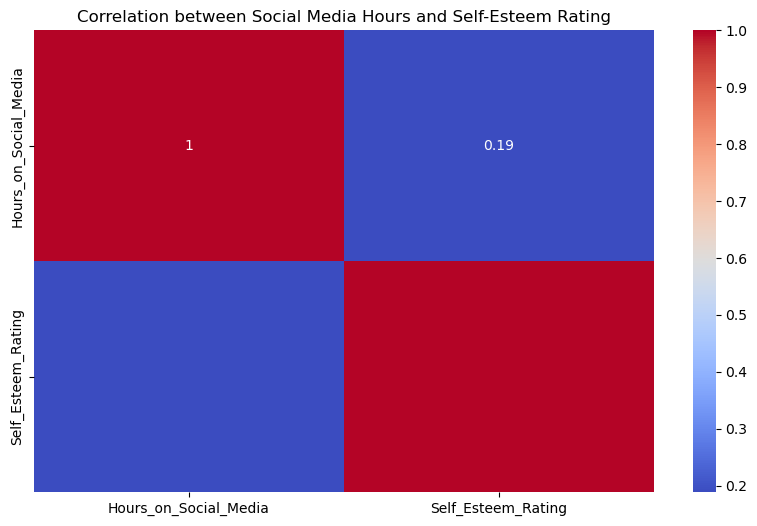

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive statistics
descriptive_stats = data_cleaned.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Correlation analysis
correlation = data_cleaned[['Hours_on_Social_Media', 'Self_Esteem_Rating']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Cross-tabulation: Gender vs. Self-Esteem
cross_tab_gender = pd.crosstab(data_cleaned['Gender'], data_cleaned['Self_Esteem_Rating'])
print("\nCross-tabulation: Gender vs. Self-Esteem:")
print(cross_tab_gender)

# Plotting correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Social Media Hours and Self-Esteem Rating')
plt.show()


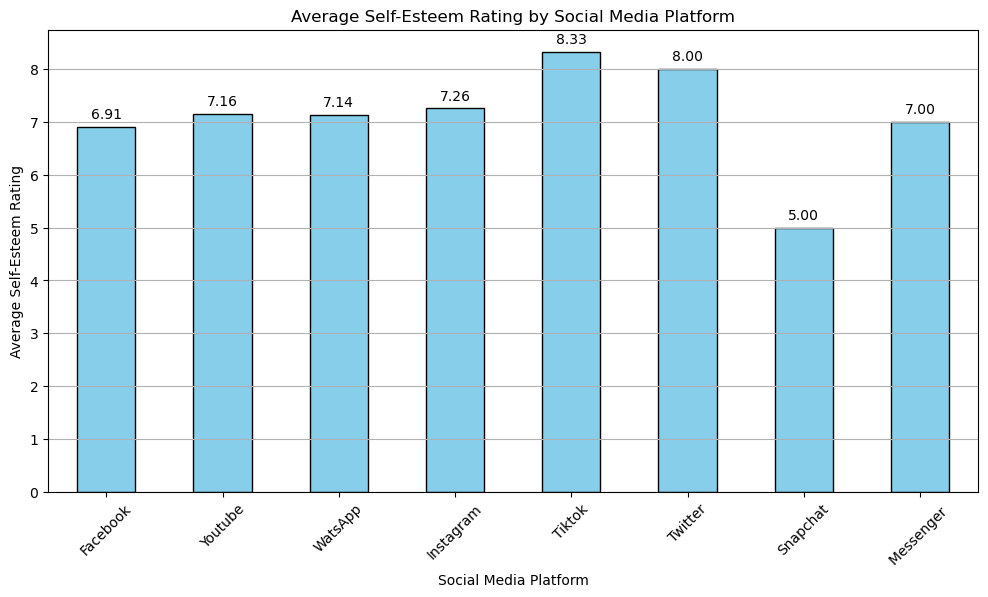

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Social_Media_Usage_Servey.xlsx'
df = pd.read_excel(file_path, sheet_name='Social Media Usage and Self-Est')

# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Extract unique social media platforms
unique_platforms = df['Social_Media_Platforms'].str.split(';').explode().unique()

# Create a column for each platform indicating if the respondent uses it or not
for platform in unique_platforms:
    df[platform] = df['Social_Media_Platforms'].apply(lambda x: platform in x)

# Calculate the mean self-esteem rating for each platform
platform_means = df[unique_platforms].multiply(df['Self_Esteem_Rating'], axis=0).sum() / df[unique_platforms].sum()

# Bar Chart for Self-Esteem Rating by Social Media Platform
plt.figure(figsize=(12, 6))
ax = platform_means.plot(kind='bar', color='skyblue', edgecolor='black')
add_data_labels(ax)
plt.title('Average Self-Esteem Rating by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Self-Esteem Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Average_Self_Esteem_by_Platform.png')
plt.show()


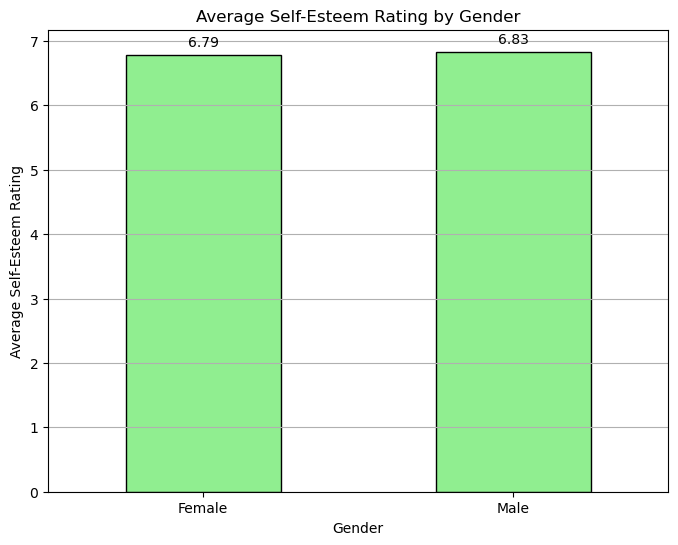

In [5]:
# Bar Chart for Self-Esteem Rating by Gender
gender_means = df.groupby('Gender')['Self_Esteem_Rating'].mean()

plt.figure(figsize=(8, 6))
ax = gender_means.plot(kind='bar', color='lightgreen', edgecolor='black')
add_data_labels(ax)
plt.title('Average Self-Esteem Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Self-Esteem Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('Average_Self_Esteem_by_Gender.png')
plt.show()


/var/folders/p2/_4hnjhpx6rb4b0x3r2z_vtx80000gn/T/ipykernel_21825/1217620061.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_gender_counts = df.groupby(['Gender', 'Time_Binned']).size().unstack(fill_value=0)


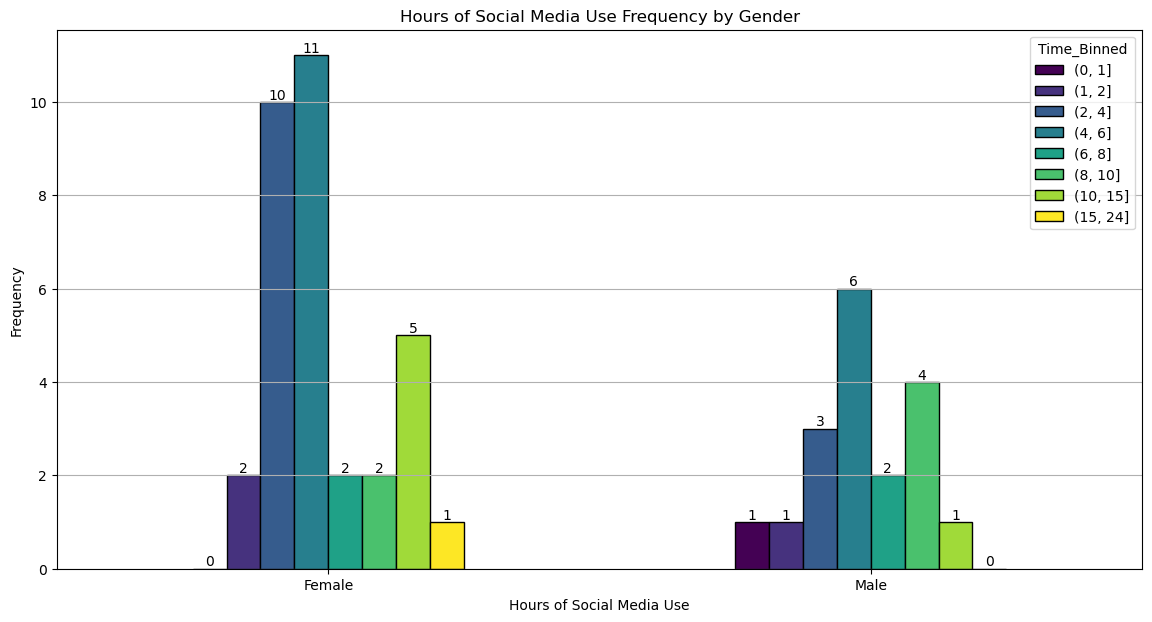

In [6]:
# Bar Chart for Hours of Social Media Use Frequency by Gender
time_bins = [0, 1, 2, 4, 6, 8, 10, 15, 24]
df['Time_Binned'] = pd.cut(df['Time_Spending_on_Social_Media'], bins=time_bins)

time_gender_counts = df.groupby(['Gender', 'Time_Binned']).size().unstack(fill_value=0)

ax = time_gender_counts.plot(kind='bar', figsize=(14, 7), edgecolor='black', colormap='viridis')
plt.title('Hours of Social Media Use Frequency by Gender')
plt.xlabel('Hours of Social Media Use')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Hours_of_Social_Media_Use_by_Gender.png')
plt.show()


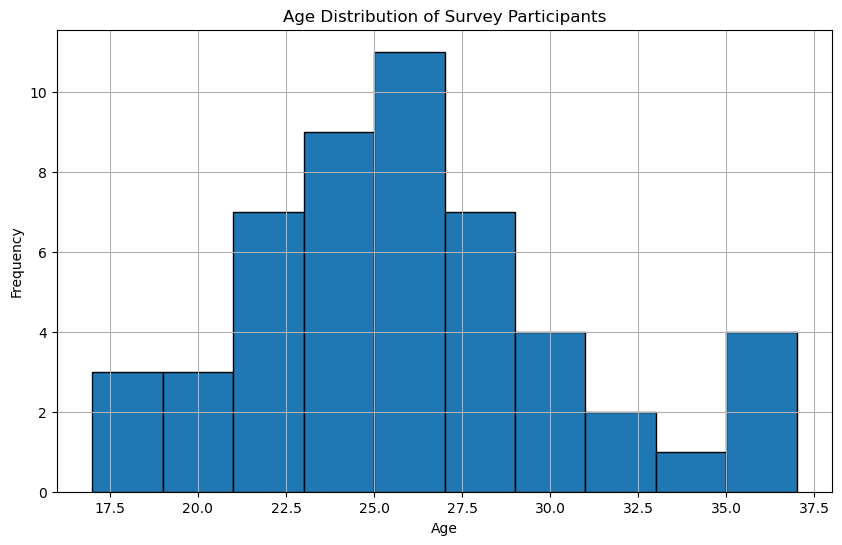

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Social_Media_Usage_Servey.xlsx'
df = pd.read_excel(file_path, sheet_name='Social Media Usage and Self-Est')

# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Age_Distribution.png')
plt.show()


/var/folders/p2/_4hnjhpx6rb4b0x3r2z_vtx80000gn/T/ipykernel_21825/3981933791.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = df.groupby('Age_Group')[['Self_Esteem_Rating', 'Time_Spending_on_Social_Media']].mean()


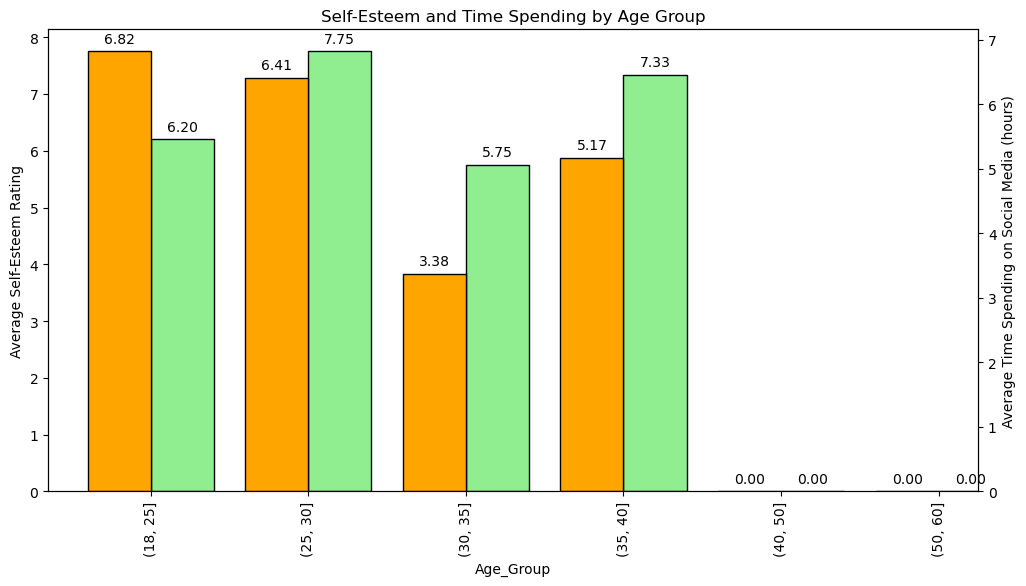

In [8]:
# Define age bins
age_bins = [18, 25, 30, 35, 40, 50, 60]

# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Comparison of Self-Esteem and Time Spending by Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)
age_group_means = df.groupby('Age_Group')[['Self_Esteem_Rating', 'Time_Spending_on_Social_Media']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_ylabel('Average Self-Esteem Rating')
ax1.set_xlabel('Age Group')
ax1.set_title('Self-Esteem and Time Spending by Age Group')
ax1.grid(axis='y')
age_group_means['Self_Esteem_Rating'].plot(kind='bar', color='lightgreen', edgecolor='black', position=0, width=0.4, ax=ax1)
add_data_labels(ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Average Time Spending on Social Media (hours)')
age_group_means['Time_Spending_on_Social_Media'].plot(kind='bar', color='orange', edgecolor='black', position=1, width=0.4, ax=ax2)
add_data_labels(ax2)

plt.savefig('Self_Esteem_and_Time_Spending_by_Age.png')
plt.show()


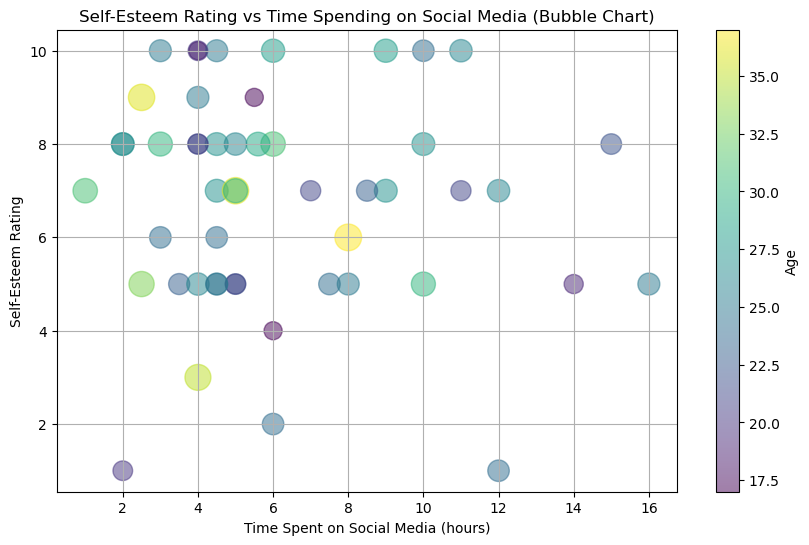

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Social_Media_Usage_Servey.xlsx'
df = pd.read_excel(file_path, sheet_name='Social Media Usage and Self-Est')

# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Bubble Chart for Self-Esteem Rating vs Time Spending on Social Media
plt.figure(figsize=(10, 6))
bubble = plt.scatter(df['Time_Spending_on_Social_Media'], df['Self_Esteem_Rating'], 
                     s=df['Age']*10, alpha=0.5, c=df['Age'], cmap='viridis')
plt.colorbar(bubble, label='Age')
plt.title('Self-Esteem Rating vs Time Spending on Social Media (Bubble Chart)')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('Self-Esteem Rating')
plt.grid(True)
plt.savefig('Self_Esteem_vs_Time_Spending_Bubble.png')
plt.show()



<Figure size 1200x600 with 0 Axes>

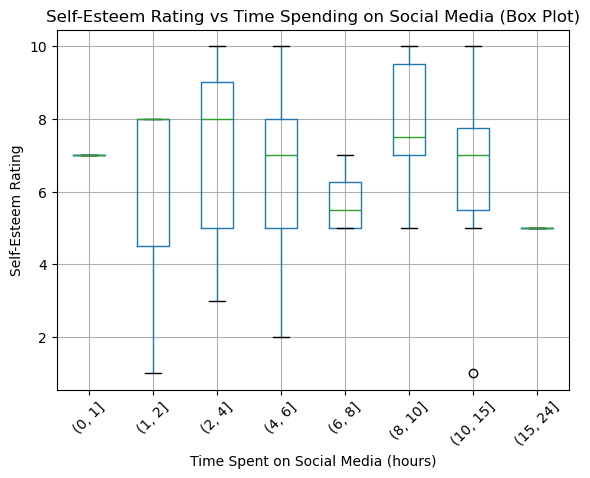

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Social_Media_Usage_Servey.xlsx'
df = pd.read_excel(file_path, sheet_name='Social Media Usage and Self-Est')

# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Create bins for time spent on social media
time_bins = [0, 1, 2, 4, 6, 8, 10, 15, 24]
df['Time_Binned'] = pd.cut(df['Time_Spending_on_Social_Media'], bins=time_bins)

# Box Plot for Self-Esteem Rating vs Time Spending on Social Media
plt.figure(figsize=(12, 6))
df.boxplot(column='Self_Esteem_Rating', by='Time_Binned', grid=False)
plt.title('Self-Esteem Rating vs Time Spending on Social Media (Box Plot)')
plt.suptitle('')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('Self-Esteem Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Self_Esteem_vs_Time_Spending_Box.png')
plt.show()
